In [ ]:
# A/B Test Result Analysis, T-test, Chi-squared test and visualizations 

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
test_data = pd.read_csv(r'D:\_EDUCATION\_DataAnalysis\homework\ab_test_data.csv')

In [2]:
# Count of users in each of the test group:
users_count = test_data.groupby('test_group').size()
print(f'Number of users in Group A: {users_count['a']}, in Group B: {users_count['b']}')  

# Count of Conversions in each of the group:
conversion_count = test_data.groupby('test_group')['conversion'].sum()
print(f'Number of conversions in Group A: {conversion_count['a']}, in Group B: {conversion_count['b']}')  

#Conversion rate for each of the group:
conv_rate = conversion_count/users_count
print(f'Conversion rate in Group A: {round(conv_rate['a'],3)}, in Group B: {round(conv_rate['b'],3)}')  

#Start/End Date of the test, duration:
test_data['timestamp'] = pd.to_datetime(test_data['timestamp'], format='mixed').dt.date
start_date = test_data['timestamp'].min()
end_date = test_data['timestamp'].max()
print(f'Test Start Date: {start_date}, End Date: {end_date}')
duration = end_date-start_date
print(f'Test duration days count: {duration}')

Number of users in Group A: 10013, in Group B: 9985
Number of conversions in Group A: 611, in Group B: 889
Conversion rate in Group A: 0.061, in Group B: 0.089
Test Start Date: 2023-07-03, End Date: 2023-07-25
Test duration days count: 22 days, 0:00:00


In [5]:
#Observe conversion distribution
alpha = 0.05
observed = pd.crosstab(test_data['test_group'].values, test_data['conversion'].values)
observed

col_0,0,1
row_0,,
a,9402,611
b,9096,889


In [7]:
#Perform the Chi-squared test
statistic, p_value, dof, expected_values = stats.chi2_contingency(observed)
alpha = 0.05
if p_value<alpha:
    print(f'''Reject the null hypothesis. There is a significant difference between conversion rates of Group A and Group B. 
    P-value is: {p_value}, Statistic is {statistic}''')
else: 
    print('Fail to Reject the null hypothesis. There is no significant difference between the Test group A and Test group B')

Reject the null hypothesis. There is a significant difference between conversion rates of Group A and Group B. 
    P-value is: 6.740440730497395e-14, Statistic is 56.14249485320227


In [9]:
# Filter data for test groups
group_a = test_data[test_data['test_group'] == 'a']['conversion']
group_b = test_data[test_data['test_group'] == 'b']['conversion']

# Perform t-test
statistic, p_value = stats.ttest_ind(group_a, group_b, alternative='less')

if p_value < alpha:
    print(f"Reject the null hypothesis. There is a significant difference between conversion rates of Group A and Group B. P-value is: {p_value}")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between conversion rates of Group A and Group B.")

Reject the null hypothesis. There is a significant difference between conversion rates of Group A and Group B. P-value is: 2.6455288192589385e-14


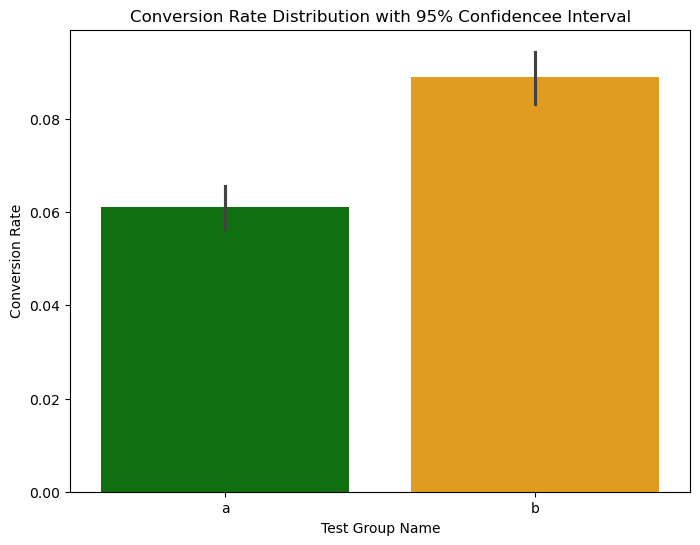

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
plt.xlabel('Test Group Name')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate Distribution with 95% Confidencee Interval')

ci_level = 100 * (1 - alpha)

sns.barplot(x='test_group',
           y='conversion',
           hue='test_group',
           data=test_data, 
           errorbar=('ci', ci_level),
           palette=['green', 'orange'],
           legend=False)
plt.show()

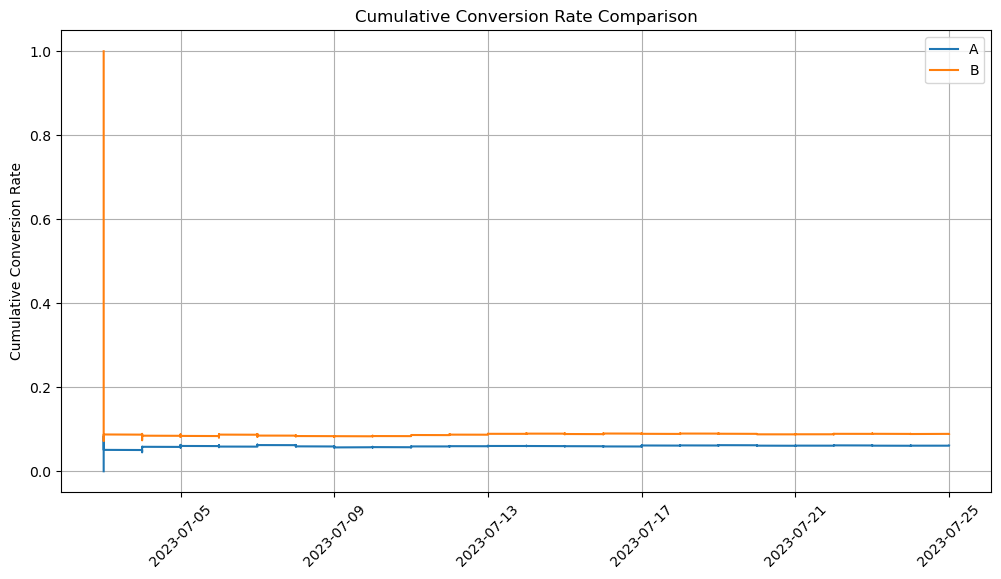

In [15]:
#Cumulative Conversion Rate Comparison
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates 

# Ensure data is sorted by timestamp
test_data = test_data.sort_values(by='timestamp')

# Compute cumulative conversion rates
cumulative_metric_a = test_data[test_data['test_group'] == 'a'].copy()
cumulative_metric_b = test_data[test_data['test_group'] == 'b'].copy()

cumulative_metric_a['cumulative_conversion'] = cumulative_metric_a['conversion'].expanding().mean()
cumulative_metric_b['cumulative_conversion'] = cumulative_metric_b['conversion'].expanding().mean()

plt.figure(figsize=(12, 6))
plt.plot(cumulative_metric_a['timestamp'], cumulative_metric_a['cumulative_conversion'], label='A')
plt.plot(cumulative_metric_b['timestamp'], cumulative_metric_b['cumulative_conversion'], label='B')

# Format X-axis to show dates properly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())  
plt.xticks(rotation=45)  

# Labels and title
plt.title('Cumulative Conversion Rate Comparison')
plt.ylabel('Cumulative Conversion Rate')

plt.legend()
plt.grid()
plt.show()